<a href="https://colab.research.google.com/github/Git-Hub-Pro/Kalmanfilter/blob/master/pos2vel_kf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv

np.random.seed(0)

In [0]:
def get_pos_vel(itime,pos_true):
    """ Return Measured Position, True Velocity and True Position"""
    w = np.random.normal(0,np.sqrt(10)) # w : system noise.
    v = np.random.normal(0,np.sqrt(10)) # v : measurement noise.

    vel_true = 80 + w                   # nominal velocity = 80 [m/s] 
    if itime == 0:
        pos_true = pos_true
    else:
        pos_true = pos_true + vel_true * dt
    z_pos_meas = pos_true + v           # z_pos_meas : measured position (observable)
    return z_pos_meas, vel_true, pos_true

In [0]:
def kalman_filter(z_meas, x_esti, P):
    """Kalman Filter Algorithm."""
    # (1) Prediction.
    x_pred = A @ x_esti
    P_pred = A @ P @ A.T + Q

    # (2) Kalman Gain.
    K = P_pred @ H.T @ inv(H @ P_pred @ H.T + R)

    # (3) Estimation.
    x_esti = x_pred + K @ (z_meas - H @ x_pred)

    # (4) Error Covariance.
    P = P_pred - K @ H @ P_pred

    return x_esti, P

In [0]:
# Input parameters.
time_end = 4
dt = 0.1

In [0]:
# Initialization for system model.
# Define matrix with rank 2 for matrix operation.
A = np.array([[1,dt],
              [0,1]])

H = np.array([[1,0]])
Q = np.array([[1,0],
             [0,3]])
R = np.array([[10]])

# Initialization for estimation.
x_0 = np.array([0,20]) # position and velocity
P_0 = 5 * np.eye(2)

In [0]:
time = np.arange(0,time_end,dt)
n_samples = len(time)
pos_meas_save = np.zeros(n_samples)
vel_true_save = np.zeros(n_samples)
pos_esti_save = np.zeros(n_samples)
vel_esti_save = np.zeros(n_samples)


In [0]:
pos_true = 0
x_esti, P = None, None
for i in range(n_samples):
    z_meas, vel_true, pos_true = get_pos_vel(i, pos_true)
    if i == 0:
        x_esti, P = x_0, P_0
    else:
        x_esti, P = kalman_filter(z_meas, x_esti, P)

    pos_meas_save[i] = z_meas
    vel_true_save[i] = vel_true
    pos_esti_save[i] = x_esti[0]
    vel_esti_save[i] = x_esti[1]

Text(0, 0.5, 'Velocity [m/s]')

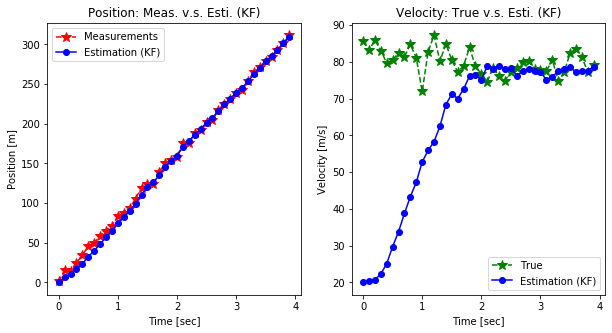

In [24]:


fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(time, pos_meas_save, 'r*--', label='Measurements', markersize=10)
plt.plot(time, pos_esti_save, 'bo-', label='Estimation (KF)')
plt.legend(loc='upper left')
plt.title('Position: Meas. v.s. Esti. (KF)')
plt.xlabel('Time [sec]')
plt.ylabel('Position [m]')

plt.subplot(1, 2, 2)
plt.plot(time, vel_true_save, 'g*--', label='True', markersize=10)
plt.plot(time, vel_esti_save, 'bo-', label='Estimation (KF)')
plt.legend(loc='lower right')
plt.title('Velocity: True v.s. Esti. (KF)')
plt.xlabel('Time [sec]')
plt.ylabel('Velocity [m/s]')